In [2]:
import seaborn as sns
iris =sns.load_dataset('iris',engine='python')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


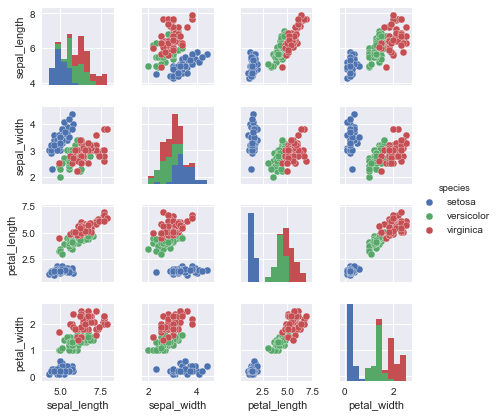

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris,hue='species',size=1.5);

In [4]:
X_iris =iris.drop('species',axis=1)
X_iris.shape

(150, 4)

In [5]:
Y_iris=iris['species']
Y_iris.shape

(150,)

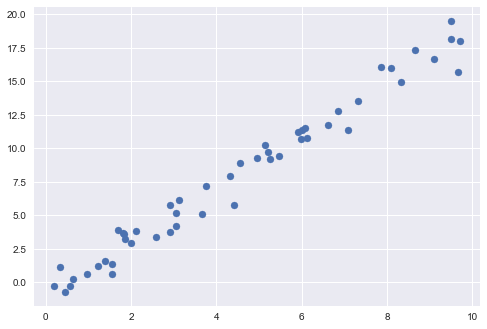

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rng=np.random.RandomState(42)
x=10*rng.rand(50)
y=2*x-1+rng.randn(50)
plt.scatter(x,y);

In [15]:
#모델 클라스를 선택한다.
"""Scikit_Learn에서 모델 클래스는 모두 파이썬 클래스로 표현된다."""
from sklearn.linear_model import LinearRegression

## 모델 초모수를 선택한다.
다음과 같은 질문들에 대답하여야 한다.
1.오프셋(절편)에 적합시킬 것인가.
2.모델을 정규화할 것인가
3.모델 유연성을 높이기 위해 특징을 사전 처리할 것인가?
4.모델에서 어느 정도의 정규화를 사용할 것인가
5.얼마나 많은 모델 성분을 사용할 것인가.

In [16]:
model=LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 데이터를 특정 행렬과 대상 벡터로 배치한다.
Scikit-Learn 에서 데이터를 표현할 때 2차원 특징 행렬과 1차원 대상 배열이 필요하다.

In [17]:
X=x[:,np.newaxis]
X.shape

(50, 1)

## 모델을 데이터에 적합시킨다.
모델의 fit() 메소드를 사용한다.
이 명령어에는 모델에 종속된 여러 가지내부 계산이 뒤따르며 계산된 결과는 모델 전용 속성에 저장된다.
fit() 절차 동안 학습된 모델 모수는 모두 뒤에 밑줄 표시('_')가 붙는다.

In [18]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
model.coef_

array([1.9776566])

In [20]:
model.intercept_

-0.9033107255311164

## 알려지지 않은 데이터에 대한 레이블을 예측한다.
훈련 데이터에 포함되지 않았던 새 데이터에 대해 이 모델이 무엇이라고 말하는지를 기반으로 모델을 평가하는 것이다.
Scikit-Learn에서는 predict() 메서드를 사용해 이 작업을 할 수 있다. 

In [21]:
xfit=np.linspace(-1,11)

In [22]:
Xfit=xfit[:,np.newaxis]
yfit=model.predict(Xfit)

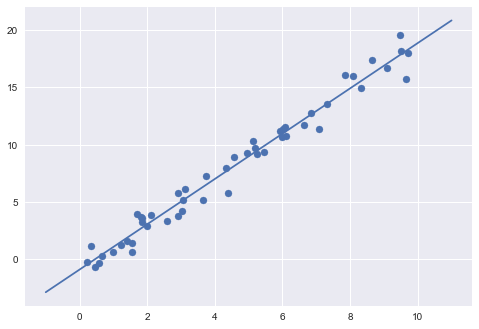

In [23]:
plt.scatter(x,y)
plt.plot(xfit,yfit);

## 지도 학습 예제: 붓꽃 분류
데이터의 일부로 훈련된 모델이 주어졌을 때 나머지 레이블을 얼마나 잘 예측할 수 있을까?

In [25]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X_iris,Y_iris,random_state=1)

In [26]:
from sklearn.naive_bayes import GaussianNB #1. 모델 클래스 선택
model= GaussianNB()                        #2. 모델 인스턴스화
model.fit(Xtrain,ytrain)                   #3. 모델을 데이터에 적합
y_model=model.predict(Xtest)               #4. 새 데이터에 대해 예측

In [27]:
#예측한 레이블 중 실제 값과 일치하는 비율이 얼마나 되는지 확인/
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

## 비지도 학습 예제: 붓꽃 차원
붓꽃 데이터는 4차원이었다. 각 표본에 대해 특징이 4가지 기록돼 있다.
차원 축소 작업은 데이터의 근본적인 특징은 유지하면서 더 낮은 차원을 가지는 적절한 표현 방식이 존재하는지 알아보는 것이다. 이 것이 데이터 시각화를 지원하기 위해 사용된다.

In [30]:
from sklearn.decomposition import PCA   #1. 모델 클래스 선택
model=PCA(n_components=2)               #2. 초모수로 모델 인스턴트화
model.fit(X_iris)                       #3. 데이터에 적합, y는 지정 안 함!
X_2D= model.transform(X_iris)           #4. 데이터를 2차원으로 변환

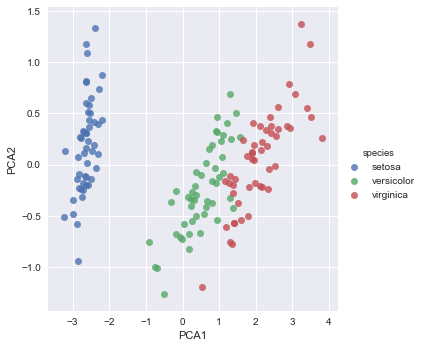

In [33]:
iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue='species',data=iris,fit_reg=False)

## 비지도 학습: 붓꽃 군집화

In [35]:
from sklearn.mixture import GMM  #1.모델 클래스 선택
model=GMM(n_components=3,covariance_type='full') #2.초모수로 모델 인스턴트화
model.fit(X_iris)    #3.데이터에 적합, y는 지정하지 않음!
y_gmm=model.predict(X_iris)    #4. 군집 레이블 결정

C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\sklearn\utils\de

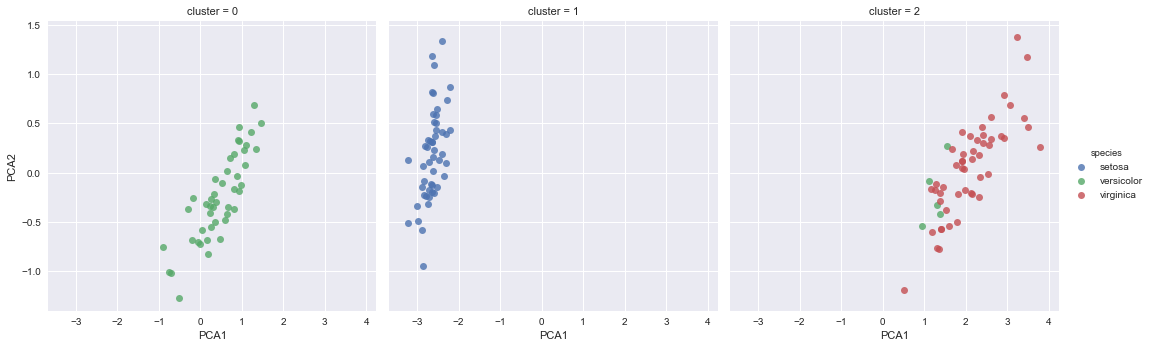

In [36]:
iris['cluster']=y_gmm
sns.lmplot("PCA1","PCA2",data=iris,hue='species',col='cluster',fit_reg=False);

## 손으로 쓴 숫자 탐색

In [4]:
from sklearn.datasets import load_digits
digits= load_digits()
digits.images.shape

(1797, 8, 8)

In [6]:
#처음 100개 시각화
import matplotlib.pyplot as plt

fig,axes = plt.subplots(10,10,figsize=(8,8), subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green')

In [7]:
#2차원 [n_samples,n_features] 표현으로 바꿔야 함
X=digits.data
X.shape

(1797, 64)

In [9]:
y=digits.target
y.shape

(1797,)

## 비지도학습: 차원축소

In [11]:
from sklearn.manifold import Isomap
iso =Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

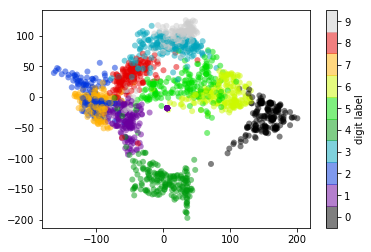

In [15]:
%matplotlib inline
plt.scatter(data_projected[:,0],data_projected[:,1],c=digits.target,edgecolors='none',alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(-0.5,9.5);

In [18]:
#분류 알고리즘을 사용
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=0)
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain,ytrain)
y_model=model.predict(Xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.83333333333333337

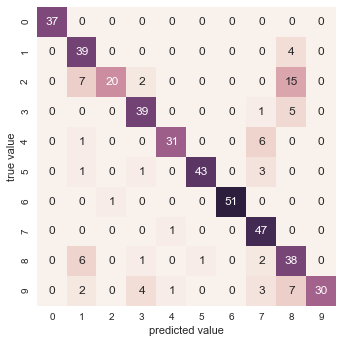

In [23]:
#정확도 약 80% 이므로 숫자 하나로는 어디에서 제대로 예측하지 못한지 알 수 없다.
#이를 알아내기 위해서 오차행렬(confusion_matrix)를 사용한다.
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest,y_model)

sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

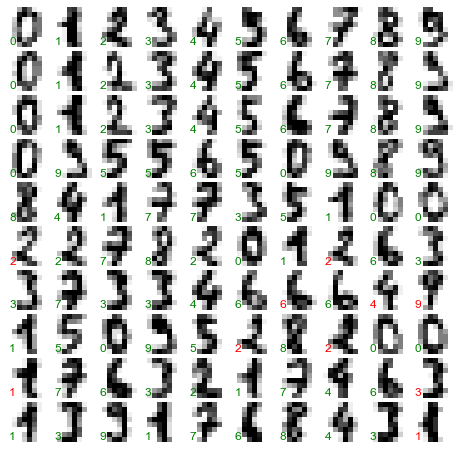

In [24]:
fig,axes = plt.subplots(10,10,figsize=(8,8), subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green' if (ytest[i]==y_model[i]) else 'red')

## 초모수와 모델 검증

모델과 모델의 초모수를 선택한 후, 훈련 데이터 일부에 이를 적용하고 예측값을 알려진 값과 비교해서 이 모델이 얼마나 효과적인지 추정할 수 있다.

In [25]:
from sklearn.datasets import load_iris
iris=load_iris()
X= iris.data
y= iris.target

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=1)


In [27]:
model.fit(X,y)
y_model=model.predict(X)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_model)
# 이 접근 방식은 같은 데이터로 모델을 훈련하고 검증한다. 라는 오류를 내포하고 있다.
# 최근접 이웃 모델은 단순히 훈련 데이터를 저장하고 이 저장된 점들과 새로운 데이터를 비교해 레이블을 예측하는 인스턴스 기반의 추정 모델이다.

1.0

## 올바른 방식의 모델 검증: 검정 표본

In [31]:
from sklearn.cross_validation import train_test_split
#데이터를 각각 50%로 나눔
X1,X2,y1,y2= train_test_split(X,y,random_state=0,train_size=0.5)
#모델을 이 가운데 하나의 데이터 집합에 적합시킴
model.fit(X1,y1)
#모델을 두 번째 데이터 집합으로 검증함.
y2_model=model.predict(X2)
accuracy_score(y2,y2_model)

0.90666666666666662

## 교차 검증을 통한 모델 검증

In [32]:
y2_model=model.fit(X1,y1).predict(X2)
y1_model=model.fit(X2,y2).predict(X1)
accuracy_score(y1,y1_model),accuracy_score(y2,y2_model)

(0.95999999999999996, 0.90666666666666662)

In [33]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model,X,y,cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [34]:
#단일 관측치 제거 방식
from sklearn.cross_validation import LeaveOneOut
scores=cross_val_score(model,X,y,cv=LeaveOneOut(len(X)))
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [36]:
scores.mean()

0.95999999999999996

## 편향-분산 트레이드오프
 고편향 모델은 데이터를 과소적합하고, 고분산 모델을 데이터를 과적합한다. 고편향 모델의 경우, 검정 표본에서의 모델 성능이 훈련 표본에서의 성능과 유사하다. 하지만 고분산 모델의 경우에는 검정 표본에서의 모델 성능이 훈련 표본에서의 성능보다도 훨씬 더 떨어진다.

### 검증 곡선의 특징
1. 훈련 점수는 언제나 검증 점수보다 높다.
2. 모델 복잡도가 너무 낮은 경우 훈련 데이터가 과소적합되는데, 이는 모델이 훈련 데이터와 미리 보지 않은 데이터 모두를 예측하지 못한다는 것이다.
3. 모델 복잡도가 너무 높은 경우 훈련 데이터가 과적합되는데, 이것은 모델이 훈련 데이터는 매우 잘 예측하지만 본 적이 없는 데이터에 대해서는 예측에 실패한다.
4. 중간값에서 검증곡선은 최댓값을 가진다. 복잡도가 이 수준이라는 것은 편향과 분산 사이의 적절한 트레디드오프가 이뤄줬음을 나타낸다.

## Scikit-Learn 의 검증 곡선
다항 회귀 모델을 사용 할 것이다. scikit-Learn에서는 연산들을 하나로 묶는 파이프라인을 사용할 것이다.

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [38]:
import numpy as np

def make_data(N,err=1.0,rseed=1):
    #임의로 데이터 표본 만들기
    rng=np.random.RandomState(rseed)
    X=rng.rand(N,1)**2
    y=10-1./(X.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return X,y
X,y=make_data(40)

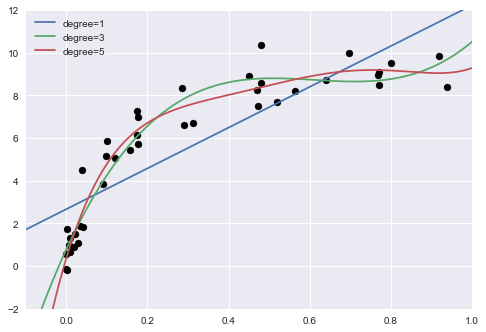

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()#플롯 형식 지정

X_test = np.linspace(-0.1,1.1,500)[:,None]

plt.scatter(X.ravel(),y,color='black')
axis=plt.axis()
for degree in [1,3,5]:
    y_test=PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best');

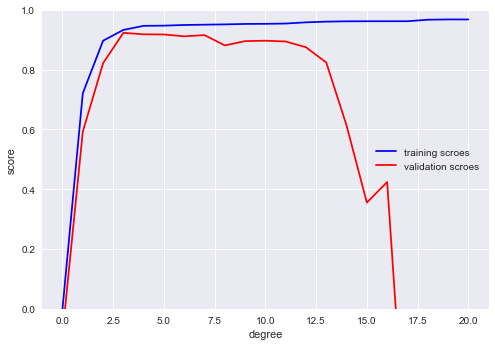

In [45]:
#검증 점수는 복잡도가 높아질수록 과적합되서 점수가 떨어진다.
from sklearn.learning_curve import validation_curve
degree=np.arange(0,21)
train_score,val_score=validation_curve(PolynomialRegression(),X,y,
                                       'polynomialfeatures__degree',degree,cv=7)
plt.plot(degree,np.median(train_score,1),color='blue',label='training scroes')
plt.plot(degree,np.median(val_score,1),color='red',label='validation scroes')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score');

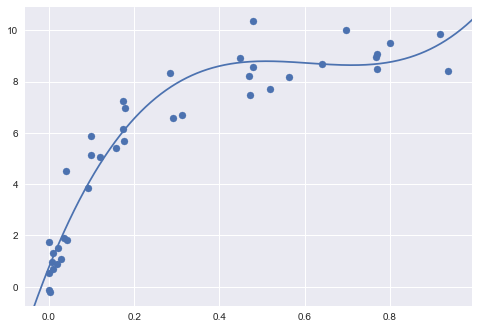

In [46]:
plt.scatter(X.ravel(),y)
lim=plt.axis()
y_test=PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test);
plt.axis(lim);

## 학습 곡선

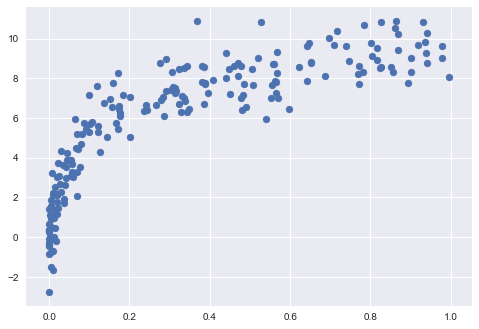

In [47]:
X2,y2=make_data(200)
plt.scatter(X2.ravel(),y2);

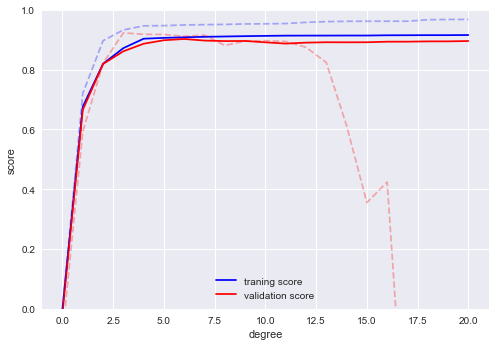

In [49]:
degree=np.arange(21)
train_score2,val_score2 =validation_curve(PolynomialRegression(),X2,y2,'polynomialfeatures__degree',degree,cv=7)
plt.plot(degree,np.median(train_score2,1),color='blue',label='traning score')
plt.plot(degree,np.median(val_score2,1),color='red',label='validation score')
plt.plot(degree,np.median(train_score,1),color='blue',alpha=0.3,linestyle='dashed')
plt.plot(degree,np.median(val_score,1),color='red',alpha=0.3,linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score');

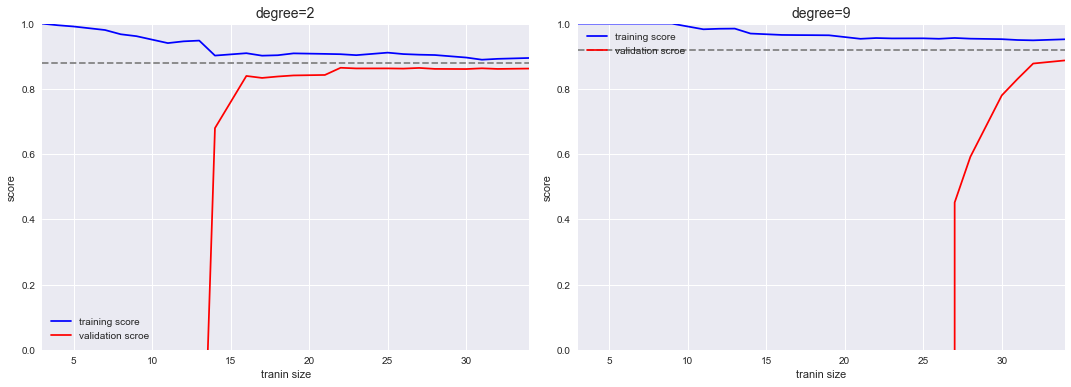

In [50]:
from sklearn.learning_curve import learning_curve

fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)

for i, degree in enumerate([2,9]):
    N,train_lc,val_lc=learning_curve(PolynomialRegression(degree),X,y,cv=7,train_sizes=np.linspace(0.1,1,25))
    ax[i].plot(N,np.mean(train_lc,1),color='blue',label='training score')
    ax[i].plot(N,np.mean(val_lc,1),color='red',label='validation scroe')
    ax[i].hlines(np.mean([train_lc[-1],val_lc[-1]]),N[0],N[-1],color='gray',linestyle='dashed')
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0],N[-1])
    ax[i].set_xlabel('tranin size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree={0}'.format(degree),size=14)
    ax[i].legend(loc='best')

## 실제 검증: 그리드 검색

In [51]:
from sklearn.grid_search import GridSearchCV

param_grid={'polynomialfeatures__degree':np.arange(21),
           'linearregression__fit_intercept':[True,False],
           'linearregression__normalize':[True,False]}

grid=GridSearchCV(PolynomialRegression(),param_grid,cv=7)

In [52]:
grid.fit(X,y);

In [53]:
#최적의 매개변수를 구할 수 있다.
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3315: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


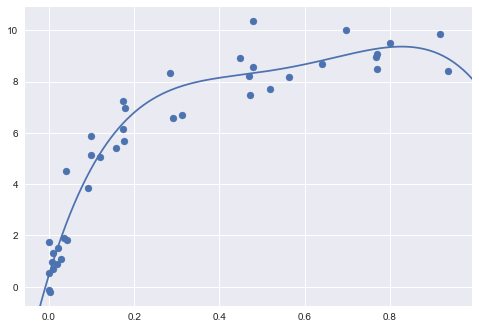

In [55]:
model=grid.best_estimator_

plt.scatter(X.ravel(),y)
lim=plt.axis()
y_test=model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test,hold=True);
plt.axis(lim);

# 특징 공학
 특징을 성격에 따라 범주 데이터를 표현하는 특징과 텍스트를 표현하는 특징, 이미지를 표현하는 특징으로 나누어 살펴본다.
 모델 복잡도를 증가시키기 위한 유도 특징과 누락 데이터 대체를 논의할 것이다.

## 범주 특징

In [1]:
data=[
    {'price':850000,'rooms':4,'neighborhood':'Queen Anne'},
    {'price':700000,'rooms':3,'neighborhood':'Fremont'},
    {'price':650000,'rooms':3,'neighborhood':'Wallingford'},
    {'price':600000,'rooms':2,'neighborhood':'Fremont'}
]

In [2]:
{'Queen Anne':1,'Fremont':2,'Wallingford':3};

In [4]:
#데이터가 딕셔너리 리스트 형태일 때 사용
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [5]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [7]:
vec=DictVectorizer(sparse=True,dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

## 텍스트 특징

In [8]:
sample=['problem of evil','evil queen','horizon problem']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
X=vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [10]:
import pandas as pd
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [11]:
#위와 다르게 단어가 문서에서 얼마나 많이 등장하느냐에 따라 단어 수에 가중치를 부여하는 기법
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
X=vec.fit_transform(sample)
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## 이미지 특징

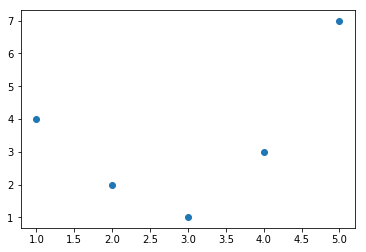

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3,4,5])
y=np.array([4,2,1,3,7])
plt.scatter(x,y)

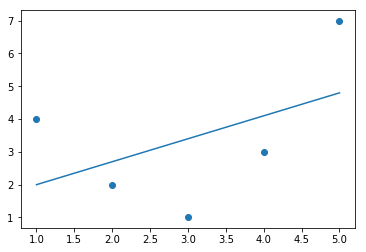

In [17]:
from sklearn.linear_model import LinearRegression
X=x[:,np.newaxis]
model=LinearRegression().fit(X,y)
yfit=model.predict(X)
plt.scatter(x,y)
plt.plot(x,yfit);

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)
X2=poly.fit_transform(X)
print(X2)

[[   1.    1.    1.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   5.   25.  125.]]


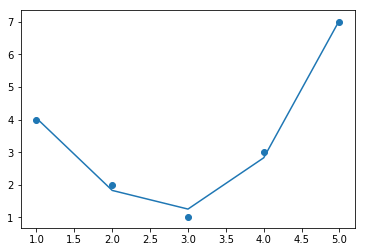

In [16]:
model= LinearRegression().fit(X2,y)
yfit=model.predict(X2)
plt.scatter(x,y)
plt.plot(x,yfit);

## 누락 데이터의 대체

In [18]:
from numpy import nan
X=np.array([[nan,0,3],
           [3,7,9],
           [3,5,2],
           [4,nan,6],
           [8,8,1]])
y=np.array([14,16,-1,8,-5])

In [19]:
#최빈값을 사용하는 경우
from sklearn.preprocessing import Imputer
imp= Imputer(strategy='mean')
X2=imp.fit_transform(X)
X2
#해당 열의 나머지 값들의 평균으로 대체

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

In [22]:
model=LinearRegression().fit(X2,y)
model.predict(X2)

array([ 13.14869292,  14.3784627 ,  -1.15539732,  10.96606197,  -5.33782027])

In [25]:
from sklearn.pipeline import make_pipeline
model= make_pipeline(Imputer(strategy='mean'),PolynomialFeatures(degree=2),LinearRegression())

In [26]:
model.fit(X,y)#X는 위에서 본 누락된 데이터를 포함한 데이터세트
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[ 14.  16.  -1.   8.  -5.]


## 나이브 베이즈 분류
대체로 매우 높은 차원의 데이터세트에 적합한 상당히 빠르고 간단한 분류 알고리즘을 가지고 있다. 매우 빠르고 조정 가능한 모수가 매우 적기 때문에 분류 문제에서 빠르고 간편한 기준선으로 쓰기에 매우 유용하다.

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### 가우스 나이브 베이즈

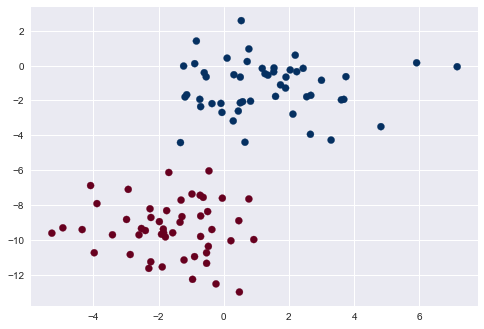

In [31]:
from sklearn.datasets import make_blobs
X,y=make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="RdBu");

In [32]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X,y);

In [33]:
rng=np.random.RandomState(0)
Xnew=[-6,14]+[14,18]*rng.rand(2000,2)
ynew=model.predict(Xnew)

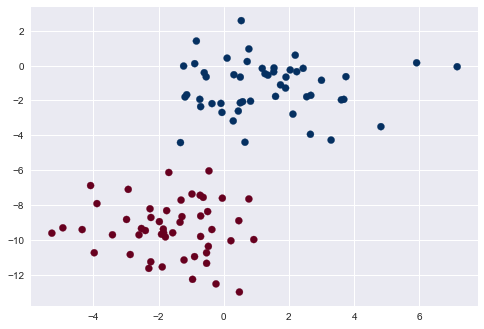

In [34]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')
lim=plt.axis()
plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,s=20,cmap='RdBu',alpha=0.1)
plt.axis(lim);

In [35]:
yprod=model.predict_proba(Xnew)
yprod[-8:].round(2)

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

### 다항분포 나이즈 베이즈

In [36]:
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [38]:
categories=['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']
train=fetch_20newsgroups(subset='train',categories=categories)
test=fetch_20newsgroups(subset='test',categories=categories)

In [39]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model=make_pipeline(TfidfVectorizer(),MultinomialNB())

In [41]:
model.fit(train.data,train.target)
labels=model.predict(test.data)

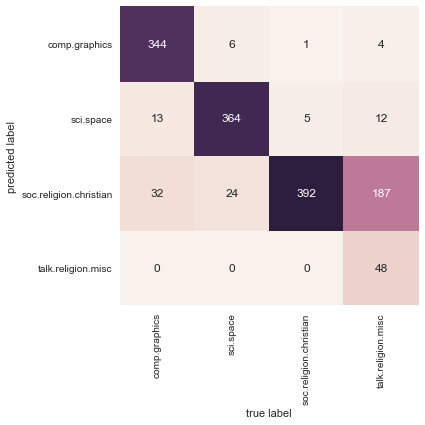

In [42]:
from sklearn.metrics import confusion_matrix
mat= confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False, xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [43]:
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [44]:
predict_category('sending a payload to the ISS')

'sci.space'

In [45]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [46]:
predict_category('determining the screen resolution')

'comp.graphics'

## 언제 나이브 베이즈 모델을 사용할 것인가.

1. 훈련과 예측이 매우 빠르다
2. 간단한 확률 예측을 제공한다.
3. 대체로 해석이 매우 쉽다.
4. 조정 가능한 모수가 매우 적다.

특히 다음 상황에서 잘 동작을 한다.

1. 순진한 가정이 실제로 데이터에 부합할 때.
2. 매우 잘 구분된 범주를 가진 경우, 모델 복잡도가 별로 중요하지 않을 때.
3. 매우 고차원 데이터를 가진 경우, 모델 복잡도가 별로 중요하지 않을 때.

# 선형 회귀

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

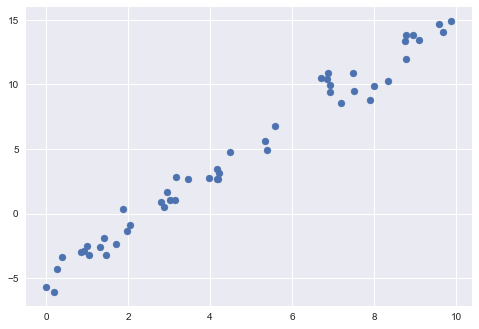

In [2]:
rng=np.random.RandomState(1)
x=10*rng.rand(50)
y=2*x-5+rng.randn(50)
plt.scatter(x,y);

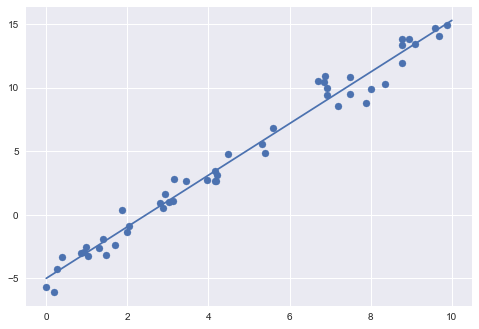

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis],y)
xfit= np.linspace(0,10,1000)
yfit=model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit);

In [4]:
#데이터의 기울기와 절편은 적합 모수에 포함되는데 맨 뒤에 밑줄을 붙여 표시한다.
print("Model slope: ",model.coef_[0])
print("Model intercept: ",model.intercept_)

Model slope:  2.02720881036
Model intercept:  -4.99857708555


In [5]:
rng=np.random.RandomState(1)
X=10*rng.rand(100,3)
y=0.5+np.dot(X,[1.5,-2.,1.])

model.fit(X,y)
print(model.intercept_)
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


## 기저 함수 회귀

In [6]:
from sklearn.preprocessing import PolynomialFeatures
x=np.array([2,3,4])
poly=PolynomialFeatures(3,include_bias=False)
poly.fit_transform(x[:,None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

In [7]:
from sklearn.pipeline import make_pipeline
poly_model= make_pipeline(PolynomialFeatures(7),LinearRegression())

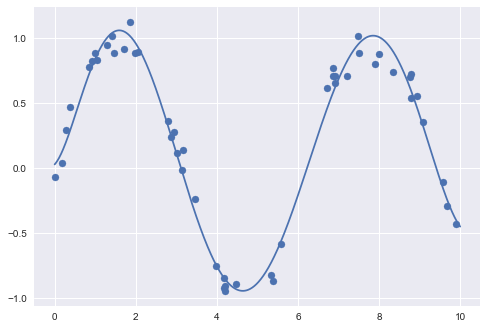

In [8]:
rng=np.random.RandomState(1)
x=10*rng.rand(50)
y=np.sin(x)+0.1*rng.randn(50)

poly_model.fit(x[:,np.newaxis],y)
yfit=poly_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit);

### 가우스 기저 함수

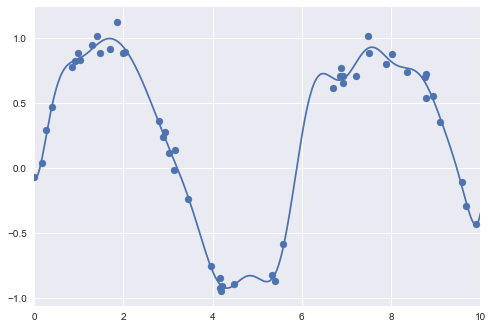

In [9]:
from sklearn.base import BaseEstimator,TransformerMixin

class GaussianFeatures(BaseEstimator,TransformerMixin):
    """1차원 입력에 대해 균일한 간격을 가지는 가우시안의 특징"""
    def __init__(self,N,width_factor=2.0):
        self.N=N
        self.width_factor=width_factor
    @staticmethod
    def _gauss_basis(x,y,width,axis=None):
        arg=(x-y)/width
        return np.exp(-0.5*np.sum(arg**2,axis))
    
    def fit(self,X,y=None):
        #데이터 범위를 따라 펼쳐진 N개의 중앙점 생성
        self.centers_=np.linspace(X.min(),X.max(),self.N)
        self.width_=self.width_factor*(self.centers_[1]-self.centers_[0])
        return self
    
    def transform(self,X):
        return self._gauss_basis(X[:,:,np.newaxis],self.centers_,self.width_,axis=1)

gauss_model =make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:,np.newaxis],y)
yfit=gauss_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlim(0,10);

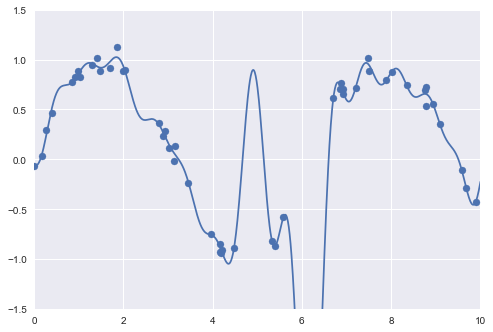

In [10]:
#기저 함수를 선형 회귀에 도입하면 모델이 더 유연해지지만 매우 빠르게 과적합 될 수 있다.
model= make_pipeline(GaussianFeatures(30),LinearRegression())
model.fit(x[:,np.newaxis],y)

plt.scatter(x,y)
plt.plot(xfit,model.predict(xfit[:,np.newaxis]))

plt.xlim(0,10)
plt.ylim(-1.5,1.5);

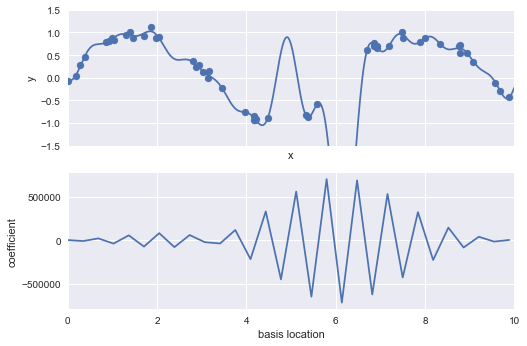

In [14]:
#아래 그림과 같은 진폭은 기저 함수가 겹칠 때 나타나는 전형적인 과적합
def basis_plot(model,title=None):
    fig, ax = plt.subplots(2,sharex=True)
    model.fit(x[:,np.newaxis],y)
    ax[0].scatter(x,y)
    ax[0].plot(xfit,model.predict(xfit[:,np.newaxis]))
    ax[0].set(xlabel='x',ylabel='y',ylim=(-1.5,1.5))
    
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',ylabel='coefficient',xlim=(0,10))
    
model=make_pipeline(GaussianFeatures(30),LinearRegression())
basis_plot(model)

### 능선 회귀(L2정규화)

모델 계수의 제곱의 합에 페널티를 부과한다.

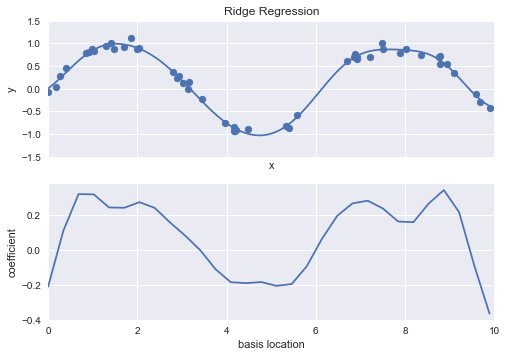

In [15]:
from sklearn.linear_model import Ridge
model=make_pipeline(GaussianFeatures(30),Ridge(alpha=0.1))
basis_plot(model,title="Ridge Regression")

### 라쏘 정규화
회귀 계수들의 절대값의 합에 페널티를 부여

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


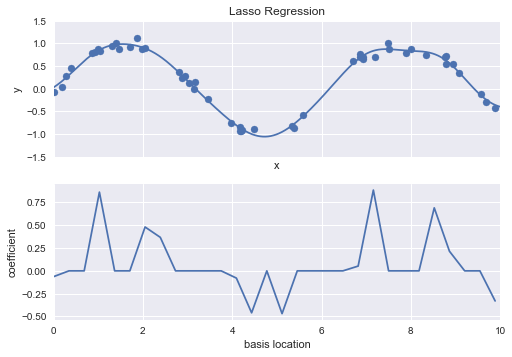

In [16]:
from sklearn.linear_model import Lasso
model= make_pipeline(GaussianFeatures(30),Lasso(alpha=0.001))
basis_plot(model,title='Lasso Regression')

#### 예제: 자전거 통행량 예측

In [21]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  159k    0  159k    0     0  56150      0 --:--:--  0:00:02 --:--:-- 56150
100  623k    0  623k    0     0   152k      0 --:--:--  0:00:04 --:--:--  152k
100  975k    0  975k    0     0   202k      0 --:--:--  0:00:04 --:--:--  202k
100 1433k    0 1433k    0     0   257k      0 --:--:--  0:00:05 --:--:--  301k


In [72]:
import pandas as pd
counts=pd.read_csv('FremontBridge.csv',index_col="Date",parse_dates=True)
weather=pd.read_csv('BicycleWeather.csv',index_col="DATE",parse_dates=True)

ValueError: 'DATE' is not in list

In [68]:
#다운이 안받아짐..
! curl -O https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/notebooks/data/master/BicycleWeather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    15  100    15    0     0     21      0 --:--:-- --:--:-- --:--:--    21


In [70]:
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [7]:
! curl -O https://github.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100     9    0     9    0     0      8      0 --:--:--  0:00:01 --:--:--     8
100     9    0     9    0     0      8      0 --:--:--  0:00:01 --:--:--     8


In [4]:
weather=pd.read_csv('BicycleWeather.csv')

In [6]:
weather

,"<html><body>You are being <a href=""https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/data/BicycleWeather.csv"">redirected</a>.</body></html>"


## 서포트 벡터 머신

분류와 회귀 분석에 모두 사용할 수 있는 특히 강력하고 유연한 지도 학습 알고리즘이다.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;sns.set()
from scipy import stats

### 서포트 벡터 머신의 동기

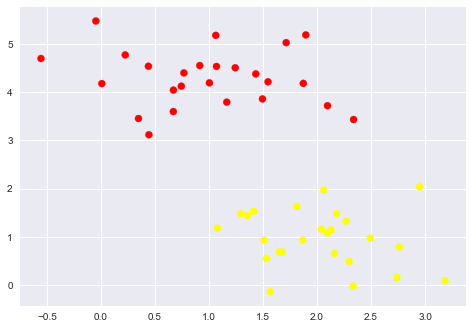

In [10]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50, centers=2,random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn');

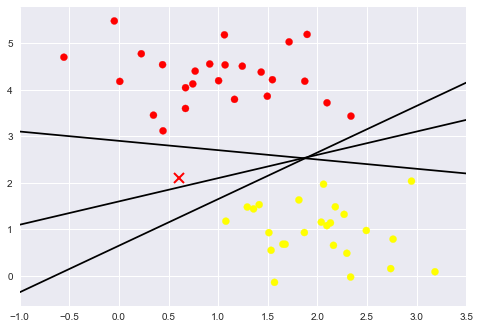

In [12]:
# 임의로 두 군집을 분할하는 선을 그릴 수는 있지만 새로운 데이터(X)의 레이블이 달라지게 된다.
xfit =np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)
for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,3.5);

### 서포트 벡터 머신: 마진 최대화
클래스 사이에 단순히 폭이 0인 선을 그리는 것이 아니라 각 선에서 주변의 가장 가까운 점에 이르는 너비의 마진을 그리는 것이다.

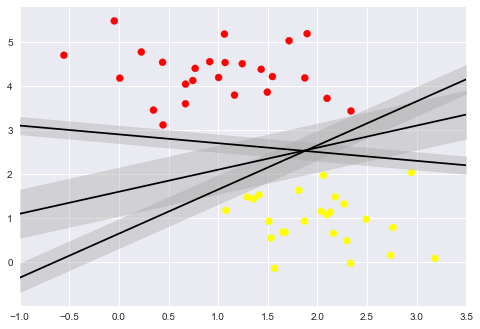

In [13]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5);

### 서포트 벡터 머신 적합하기

In [14]:
from sklearn.svm import SVC #서포트 벡터 분류기
model=SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    """2차원 SVC를 위한 의사결정 함수 플로팅하기"""
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    #모델 평가를 위한 그리드 생성
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    
    #의사결정 결과와 마진 플로팅
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    #서포트 벡터 플로팅
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300,linewidth=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

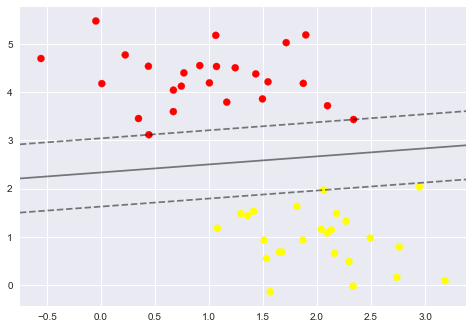

In [16]:
#마진이 최대화 되는 부분이 점과 맞닿은 점선들이다. 이 점들을 서포트 벡터라고 부르고 이 것에서 알고리즘의 이름이 나왔다.
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model);

In [17]:
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

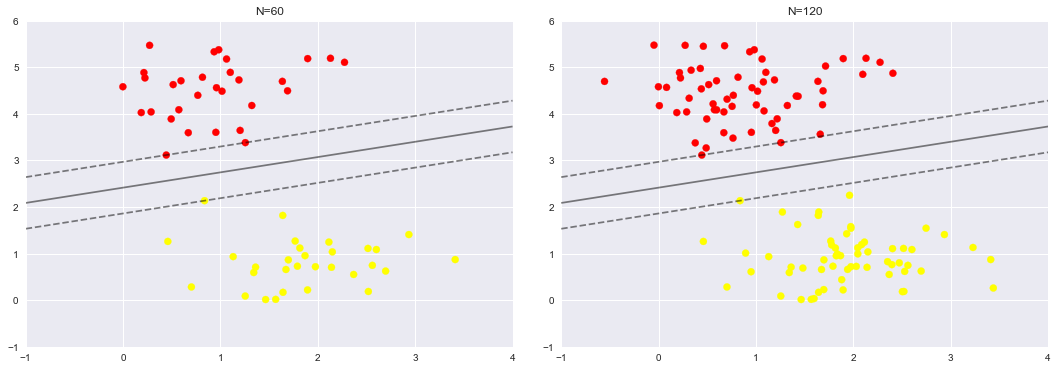

In [19]:
def plot_svm(N=10,ax=None):
    X,y=make_blobs(n_samples=200,centers=2,random_state=0,cluster_std=0.60)
    X=X[:N]
    y=y[:N]
    model=SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    
    ax= ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model,ax)

fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

### 선형 경계 너머: 커널 SVM

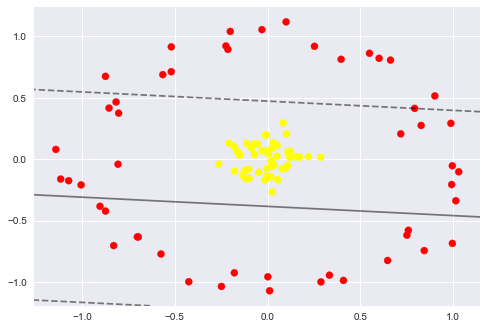

In [21]:
#비선형에서는 적합하지 않은 선형 분류기
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(100,factor=.1,noise=.1)

clf=SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

In [23]:
#방사형 기저 함수를 계산하여 분류기로 사용한다.
r=np.exp(-(X**2).sum(1))

C:\ProgramData\Anaconda3\lib\site-packages\traitlets\traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


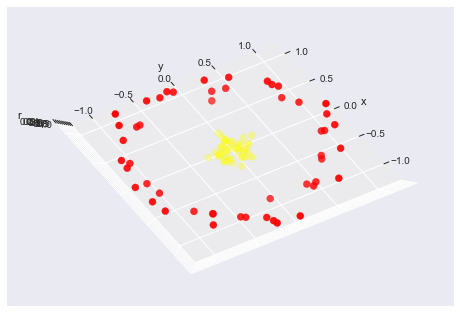

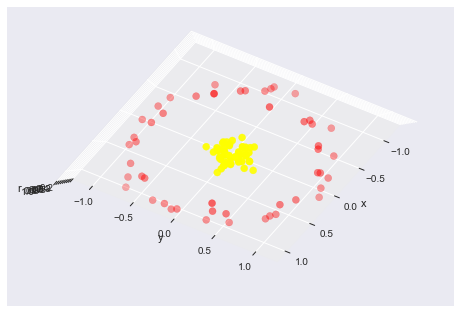

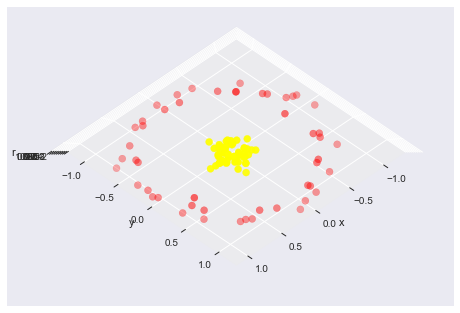

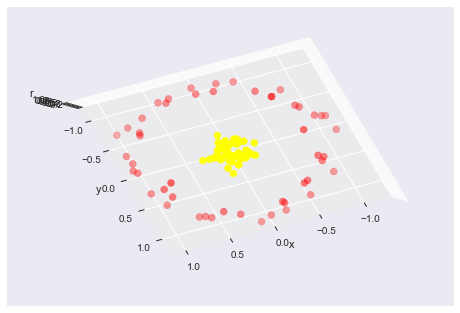

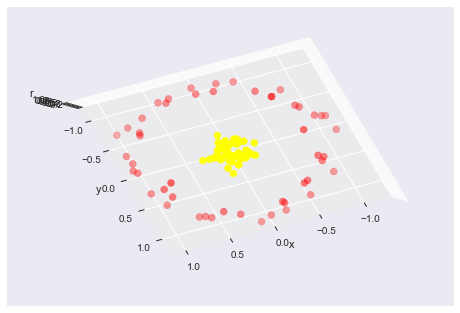

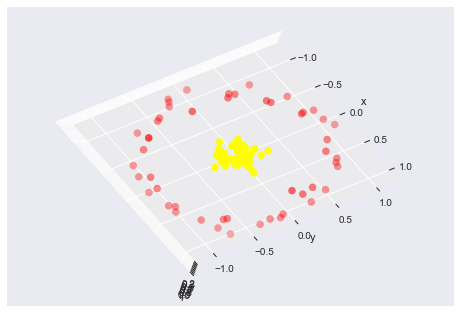

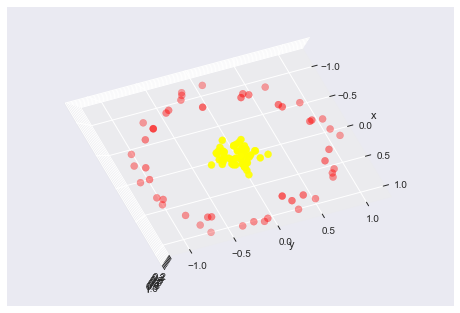

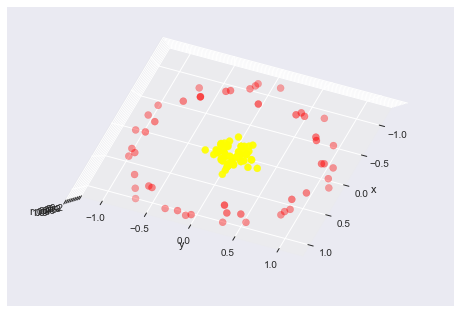

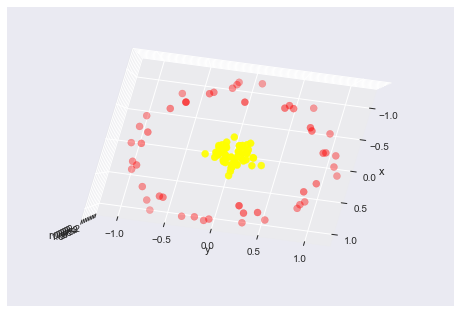

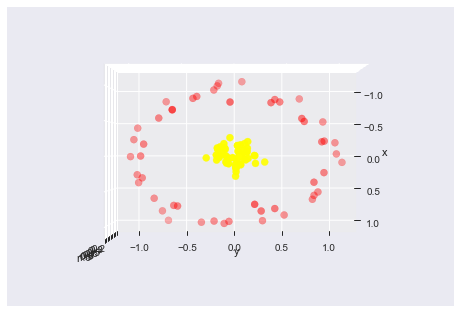

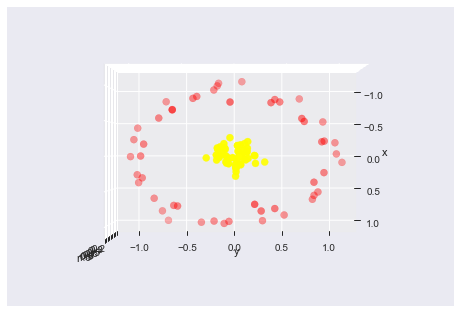

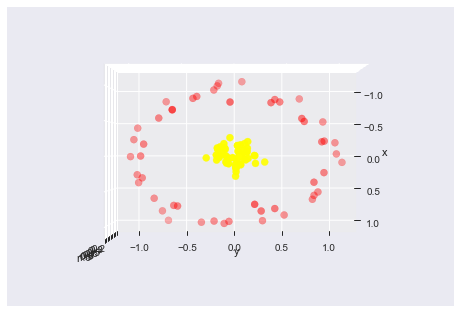

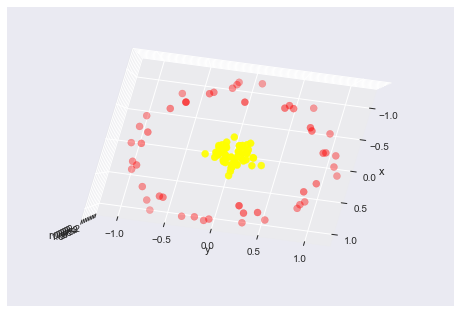

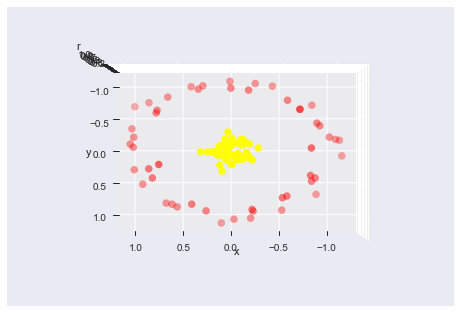

In [25]:
from ipywidgets import interact,fixed
from mpl_toolkits import mplot3d
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D,elev=[-90,90],azip=(-180,180),X=fixed(X),y=fixed(y));

In [26]:
clf=SVC(kernel='rbf',C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

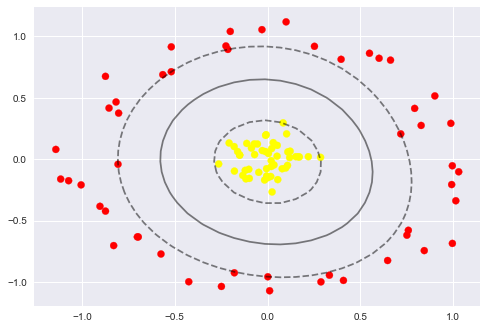

In [29]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=300,lw=1,facecolors='none');

### 마진을 부드럽게 하기

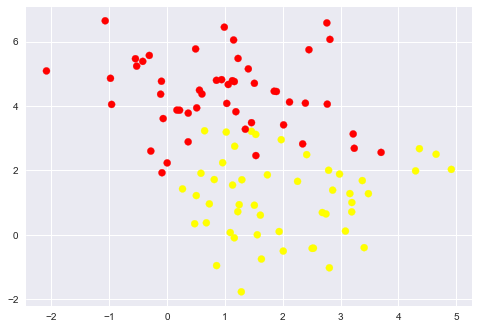

In [30]:
X,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn');

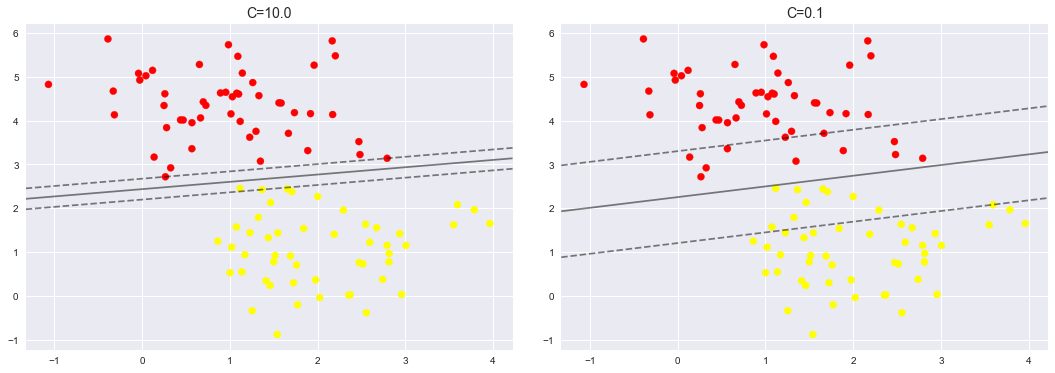

In [31]:
#퍼지 인자를 사용한다.마진의 강도는 C로 제어가 된다. C가 크면 마진이 단단해지고, 작으면 부드러워진다.
X,y=make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi, C in zip(ax,[10.0,0.1]):
    model=SVC(kernel='linear',C=C).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=300,lw=1,facecolors='none');
    axi.set_title('C={0:.1f}'.format(C),size=14)

## 예제: 안면인식

In [33]:
from sklearn.datasets import fetch_lfw_people
faces= fetch_lfw_people(min_faces_per_person=60)

NameError: name 'face' is not defined

In [36]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


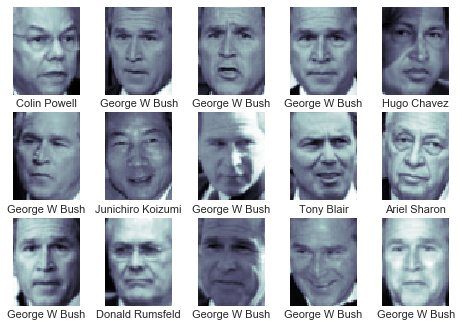

In [40]:
fig,ax=plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [42]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca=RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest= train_test_split(faces.data,faces.target,random_state=42)


In [47]:
from sklearn.grid_search import GridSearchCV
param_grid={'svc__C':[1,5,10,50],
           'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,param_grid) 
%time grid.fit(Xtrain,ytrain)
print(grid.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. T

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. T

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. T

Wall time: 1min 19s
{'svc__C': 5, 'svc__gamma': 0.001}


In [48]:
model=grid.best_estimator_
yfit=model.predict(Xtest)

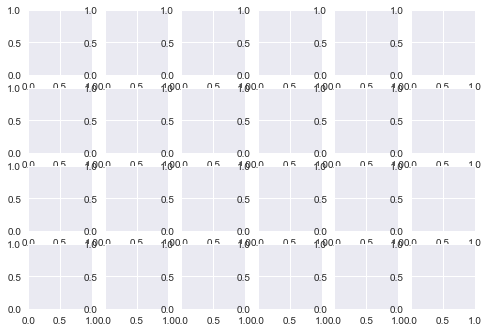

In [49]:
fig.ax=plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i]==ytest[i]else'red')
fig.suptitle("Predicted Names; Incorrect Labels in Red",size=14);

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.87      0.72        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.72      0.84      0.78        31
    George W Bush       0.98      0.80      0.88       126
Gerhard Schroeder       0.79      0.83      0.81        23
      Hugo Chavez       0.88      0.75      0.81        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.83      0.95      0.89        42

      avg / total       0.87      0.85      0.85       337



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


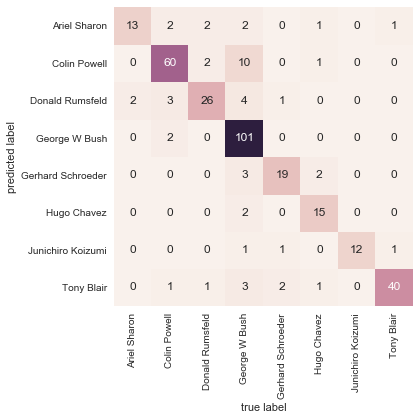

In [53]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,yfit)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## 서포트 벡터 머신 정리

서포트 벡터 머신의 장점
1. 비교적 적은 수의 서포트 벡터에 의존하기 때문에 매우 간결한 모델이며 매우 적은 메모리를 사용한다.
2. 모델이 훈련되고 나면 예측 단계가 매우 빨리 수행된다.
3. 이 모델은 마진에 인접한 점에 의해서만 영향을 받기 때문에 고차원 데이터에서 잘 동작하며, 다른 알고리즘에서는 도전적인 경우에 해당하는 표본보다 높은 차원의 데이터에 대해서도 잘 동작한다.
4. 커널 메소드와 통합하면 여러 유형의 데이터에 적응시킬 수 있어 다양한 용도로 사용할 수 있다.

서포트 벡터 머신의 단점
1. 표본 N의 개수에 따라 모델의 복잡도가 최악인 경우 O[N^3],효율적으로 구성되면 O[N^2]까지 가능하다. 훈련 표본의 개수가 크면 이 계산 비용이 어마어마하게 커질 수 있다.
2. 결과가 마진 강도 조정 모수인 C를 적절하게 선택했느냐에 따라 전적으로 달라진다. 이 값은 교차 검증을 통해 신중하게 선택해야 하는데, 데이터세트가 커질수록 비용이 커질 수 있다.
3. 결과에 대해 직접적으로 확률적 해석을 할 수 없다. 이는 내부 교차 검증을 통해 추정할 수 있지만,이 부가적인 추정 과정 또한 많은 비용이 발생한다.

## 의사결정 트리와 랜덤 포레스트

더 단순한 추정기들의 결과를 조합하는 기법의 한 예이다.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

### 의사 결정 트리

객체를 분류하거나 객체 레이블을 예측하는 매우 직관적인 방식이다.이진 분할은 이 작업을 효율적으로 만든다.

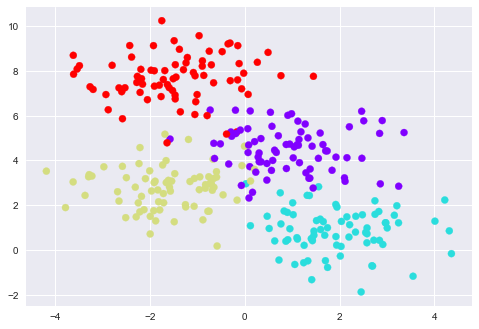

In [3]:
from sklearn.datasets import make_blobs

X,y =make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow');

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier().fit(X,y)

In [5]:
def visualize_classifier(model,X,y,ax=None,cmap='rainbow'):
    ax= ax or plt.gca()
    
    #훈련 데이터 점 플로팅
    ax.scatter(X[:,0],X[:,1],c=y,s=30,cmap=cmap,clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    #모델 적합
    
    model.fit(X,y)
    xx,yy=np.meshgrid(np.linspace(*xlim,num=200),np.linspace(*ylim,num=200))
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    
    #결과를 이용해서 컬러 플롯 생성
    n_classes=len(np.unique(y))
    contours=ax.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(n_classes+1)-0.5,cmap=cmap,clim=(y.min(),y.max()),zorder=1)
    ax.set(xlim=xlim,ylim=ylim)

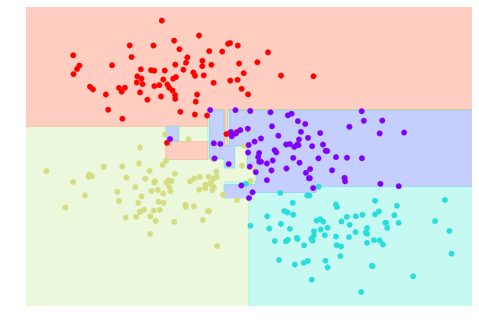

In [6]:
visualize_classifier(DecisionTreeClassifier(),X,y)

### 랜덤 포레스트
여러 과적합 추정 모델을 결합해서 이 과적합의 효과를 줄일 수 있다는 개념이 배깅이다.
배깅은 각각이 데이터에 과적합하는 유사한 추정 모델의 앙상블을 사용하고 그 결과를 평균 내어 더 나은 분류를 구한다.

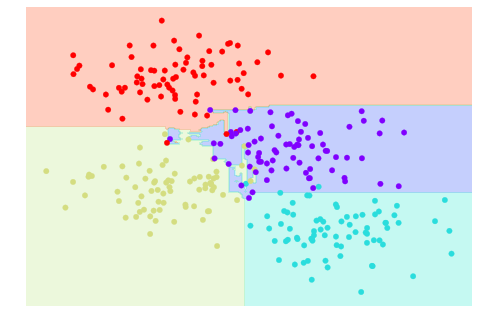

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag= BaggingClassifier(tree, n_estimators=100,max_samples=0.8,random_state=1)
bag.fit(X,y)
visualize_classifier(bag,X,y)

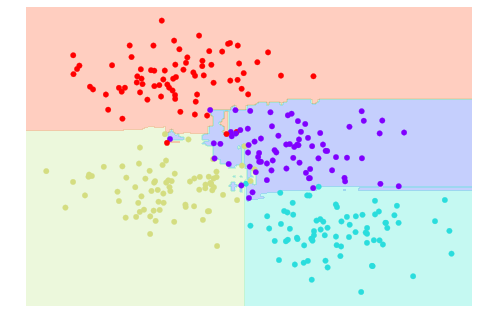

In [9]:
#추정기의 갯수만 주어지면 매우 빠르게 계산한다.
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators=100,random_state=0)
visualize_classifier(model,X,y);

### 랜덤 포레스트 회귀

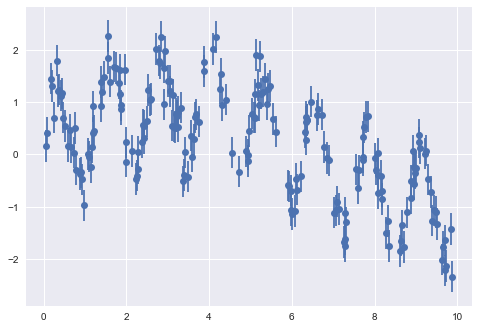

In [12]:
rng=np.random.RandomState(42)
x=10*rng.rand(200)

def model(x,sigma=0.3):
    fast_oscillation=np.sin(5*x)
    slow_oscillation=np.sin(0.5*x)
    noise=sigma*rng.randn(len(x))
    
    return slow_oscillation+fast_oscillation+noise

y=model(x)
plt.errorbar(x,y,0.3,fmt='o');

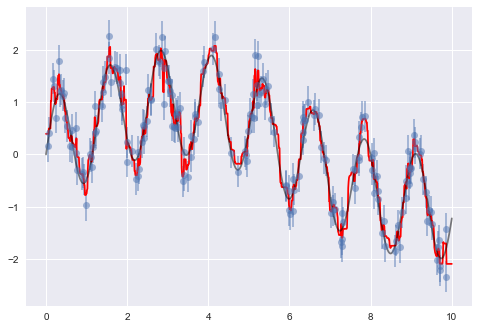

In [15]:
from sklearn.ensemble import RandomForestRegressor
forest =RandomForestRegressor(200)
forest.fit(x[:,None],y)

xfit=np.linspace(0,10,1000)
yfit=forest.predict(xfit[:,None])
ytrue = model(xfit,sigma=0)

plt.errorbar(x,y,0.3,fmt='o',alpha=0.5)
plt.plot(xfit,yfit,'-r');
plt.plot(xfit,ytrue,'-k',alpha=0.5);

## 랜덤 포레스트를 사용한 숫자 분류

In [17]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

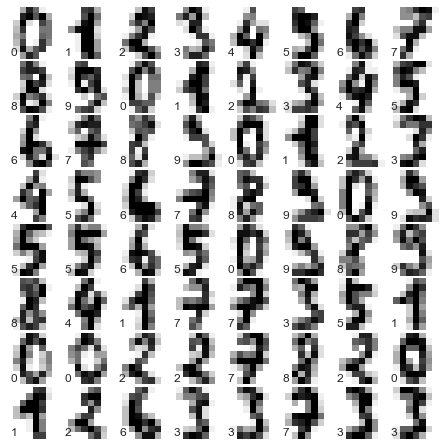

In [19]:
#그림(figure) 설정
fig=plt.figure(figsize=(6,6))#그림 크기는 인치 단위
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

#숫자 플로팅: 각 이미지는 8x8픽셀
for i in range(64):
    ax= fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    
    #대상값으로 이미지에 레이블 추가
    ax.text(0,7,str(digits.target[i]))

In [24]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(digits.data,digits.target,random_state=0)

model=RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain,ytrain)
ypred=model.predict(Xtest)

In [26]:
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       1.00      0.98      0.99        44
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



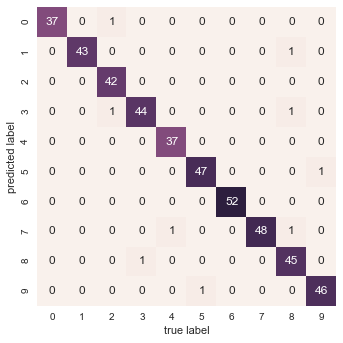

In [27]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest,ypred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## 정리

랜덤 포레스트의 장점
1. 기반 의사결정 트리가 단순해서 훈련과 예측이 모두 매우 빠르다. 게다가 그 트리가 완전히 독립적인 요소이기 때문에 두 작업 모두 간단하게 병렬처리 할 수 있다.
2. 여러 개의 트리를 사용해 확률적 분류가 가능하다. 추정기로부터 얻은 가장 많은 수의 표가 확률 추정치를 제공한다.
3. 비모수 모델은 매우 유연하기 때문에, 다른 추정기에서 과소적합된 작업에도 잘 동작할 수 있다.

단점
결과를 쉽게 해석하기 힘들다. 의미에 대한 결론을 도출해야 한다면 바람직하지 않다.

## 주성분 분석

비지도 알고리즘 중 가장 광범위하게 사용되는 것 중 하나인 주성분 분석(PCA, principal component analysis)이다. 기본적으로 차원 축소 알고리즘이지만 노이즈 필터링과 특징 추출 및 특징 공학 등에서도 유용하게 사용되는 도구다.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;sns.set()

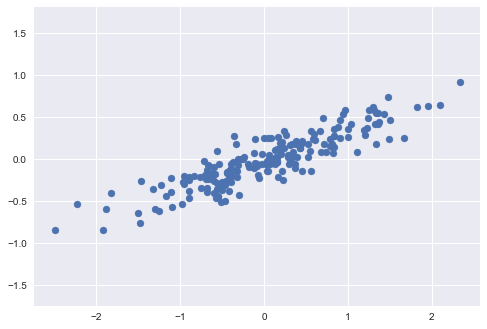

In [2]:
# 비지도 학습은 x값으로 부터 y 값을 예측하는 것이 아니라 x와 y 값 사이의 관계에 대해 학습하는 것이다.
rng = np.random.RandomState(1)
X=np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
# 데이터로 부터 얻은 성분은 벡터의 방향을 정의하는 데 사용된다.
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
# 해당 벡터의 제곱 길이를 정의하는데 사용된다.
print(pca.explained_variance_)

[ 0.75871884  0.01838551]


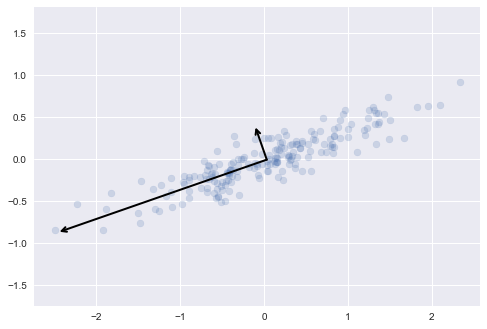

In [6]:
def draw_vector(v0,v1,ax=None):
    ax=ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)
    
#데이터 플롯팅
plt.scatter(X[:,0],X[:,1],alpha=0.2)
for length, vector in zip(pca.explained_variance_,pca.components_):
    v= vector *3 *np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_ + v)
plt.axis('equal');

## PCA 응용: 차원 축소

In [7]:
pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)
print('original shape',X.shape)
print('transformed shape',X_pca.shape)

original shape (200, 2)
transformed shape (200, 1)


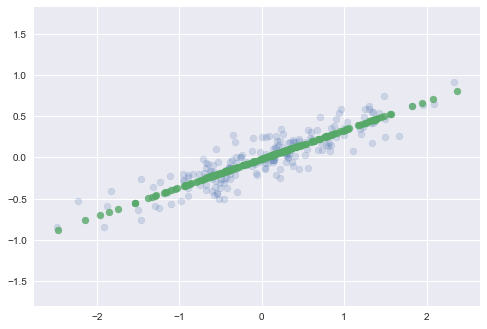

In [8]:
#가장 중요하지 않은 주축을 따르는 정보는 삭제하고 가장 높은 분산을 갖는 데이터의 성분만 남긴다.
X_new=pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal');

## PCA를 사용한 시각화

In [9]:
from sklearn.datasets import load_digits
digits= load_digits()
digits.data.shape

(1797, 64)

In [10]:
pca=PCA(2)# 64차원에서 2차원으로 사영
projected=pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


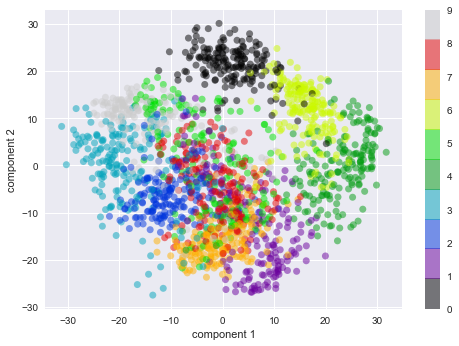

In [11]:
plt.scatter(projected[:,0],projected[:,1],c=digits.target,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 성분의 개수 선택

데이터를 설명하는 데 필요한 성분의 개수를 추정하는 능력이다. 이는 성분 개수의 함수로 누적 설명 분산 비울을 보고 결정해야 한다.

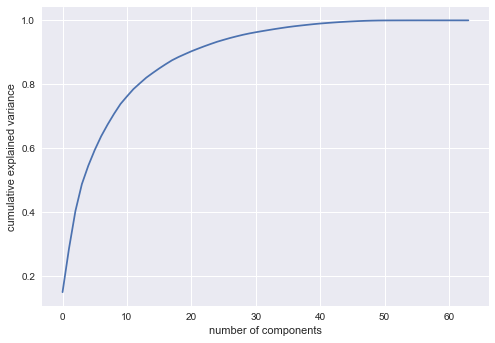

In [12]:
# 10개는 75퍼 정도 100퍼를 설명하려면 50개가 필요하다는 것을 알 수 있다.
pca=PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## PCA 응용: 노이즈 필터링

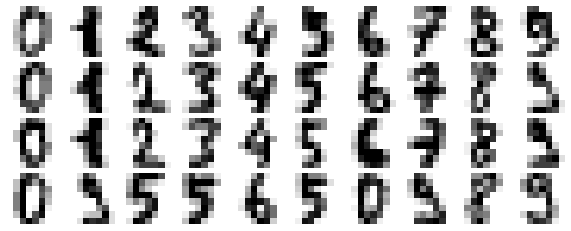

In [13]:
def plot_digits(data):
    fig,axes= plt.subplots(4,10,figsize=(10,4),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
plot_digits(digits.data)

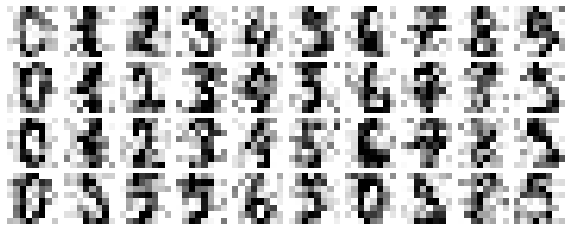

In [14]:
np.random.seed(42)
noisy=np.random.normal(digits.data,4)
plot_digits(noisy)

In [16]:
# 분산의 50%를 보존하는 조건으로 데이터를 훈련
pca=PCA(0.50).fit(noisy)
pca.n_components_

12

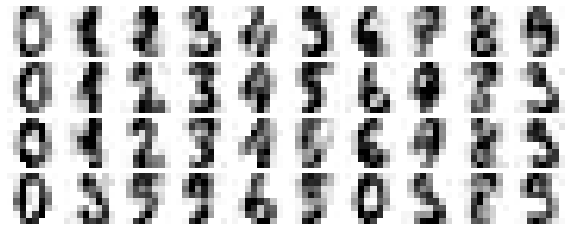

In [17]:
components=pca.transform(noisy)
filtered =pca.inverse_transform(components)
plot_digits(filtered)

### 예제: 고유 얼굴 

In [19]:
from sklearn.datasets import fetch_lfw_people
faces= fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [20]:
# 이 데이터세트는 규모가 크기 때문에 RandomizedPCA를 사용한다.
from sklearn.decomposition import RandomizedPCA
pca=RandomizedPCA(150)
pca.fit(faces.data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


RandomizedPCA(copy=True, iterated_power=2, n_components=150,
       random_state=None, whiten=False)

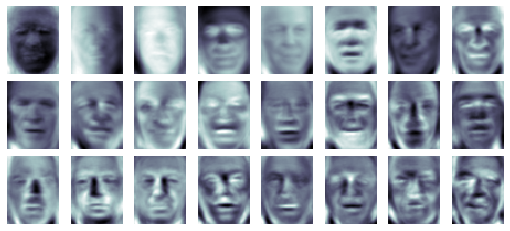

In [21]:
fig,axes= plt.subplots(3,8,figsize=(9,4),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47),cmap='bone')

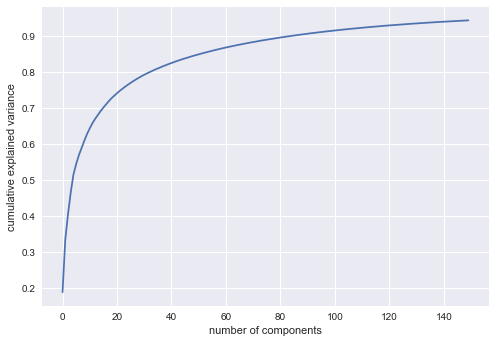

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [24]:
#성분과 사용된 얼굴 계산
pca=RandomizedPCA(150).fit(faces.data)
components= pca.transform(faces.data)
projected = pca.inverse_transform(components)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


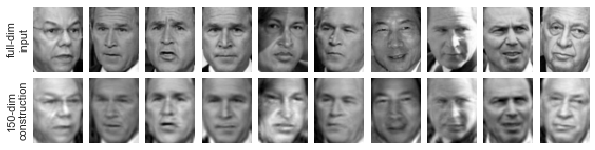

In [25]:
#결과 플로팅
fig,ax = plt.subplots(2,10,figsize=(10,2.5),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
    ax[1,i].imshow(projected[i].reshape(62,47),cmap='binary_r')

ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('150-dim\nconstruction');